In [38]:
import dinkum
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue

In [27]:
dinkum.reset()

Base model. Activating ligand in one cell only to induce oscillation feedback

start=1 stop=10


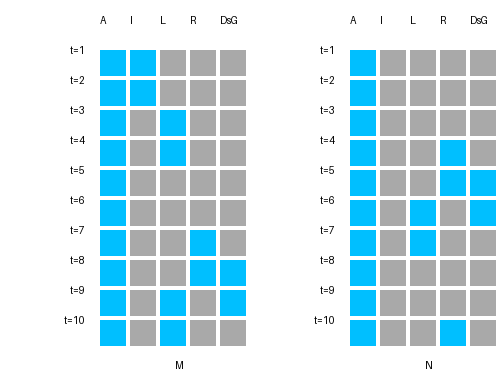

In [50]:
dinkum.reset()

# create two tissues and make them neighbours
m = Tissue(name='M') # cell m
n = Tissue(name='N') # cell n
m.add_neighbor(neighbor=n)
n.add_neighbor(neighbor=m)

ligand = Gene(name='L')                 # Define ligand   
receptor = Receptor(name='R')           # Define Receptor

initiator = Gene(name='I')              # Define initiator to initiate ligand expression and start the GRN
downstream_gene = Gene(name='DsG')      # Define downstream gene

activator = Gene(name='A')              # activator to control expression of the receptor

receptor.ligand(activator=activator, ligand=ligand)  # set receptor activator and ligand

activator.is_present(where=m, start=1)   # Set conditions of receptor expression in m and n
activator.is_present(where=n, start=1)

initiator.is_present(where=m, start=1, duration=2)   # set starting expression for the ligand in both cell types via initiator
#initiator.is_present(where=n, start=1, duration=2)   

ligand.activated_or(sources=[initiator,receptor], delay=2)  # ligand activated by initiator or receptor
downstream_gene.activated_by(source=receptor, delay=1)       # downstream gene activated by receptor

dinkum.run_and_display(stop=10, gene_names=['A', 'I', 'L', 'R', 'DsG'])  # Run model and define order of gene names

